# Online Store Video Games Analysis

# Project description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

In [1]:
!pip install squarify

# Step 1. Open the data file and study the general information

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import squarify

data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2251,Space Jam,PS,1996.0,Sports,0.51,0.35,0.0,0.06,NaN,NaN,NaN
8586,The Powerpuff Girls: Chemical X-Traction,N64,2001.0,Action,0.13,0.03,0.0,0.00,NaN,NaN,NaN
15647,Broken Sword: The Sleeping Dragon,XB,2003.0,Adventure,0.01,0.00,0.0,0.00,77.0,8.3,T
6349,Mass Effect 3,WiiU,2012.0,Role-Playing,0.14,0.11,0.0,0.02,NaN,NaN,NaN
4820,MX vs. ATV Unleashed,XB,2005.0,Racing,0.32,0.07,0.0,0.01,80.0,8.3,E


In [6]:
#len(data)
data.shape

(16715, 11)

Calling the info() method helps us understand Dtypes which I will cover later hwne needed, but what is interesting in calling this method, it gives me an expectation on the nulls values. As you can see below, there are 3 columns which contain lots of null values; these columns are:  Critic_Score, User_Score, and Rating. This is a reminder and headsup when coming to work with these columns.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:

data.notnull().sum()

Name               16713
Platform           16715
Year_of_Release    16446
Genre              16713
NA_sales           16715
EU_sales           16715
JP_sales           16715
Other_sales        16715
Critic_Score        8137
User_Score         10014
Rating              9949
dtype: int64

In [9]:

data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Using the describe() method brings the statistical summaries for the columns which have numeric values. What we can see of this statistical summary that we have lots of missing values or there are lots of zeros, but keep in mind,that zeros can be missing values which I assume this is the case here. But's it's a headsup for ivestgating furhter on these columns: NA_sales, EU_sales, JP_sales, Other_sales.

In [10]:
#summarizing the columns which have numeric values
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Using a loop to see how many  0s are in each column, and as we can see below, the columns which brought 0s, are the same which were described above: NA_sales, EU_sales, JP_sales, Other_sales.

In [11]:
#Using a loop to see how many  0s are in each column
for i in data.columns:
    print(i, len(data[data[i] == 0]))

Name 0
Platform 0
Year_of_Release 0
Genre 0
NA_sales 4508
EU_sales 5870
JP_sales 10514
Other_sales 6601
Critic_Score 0
User_Score 0
Rating 0


Calling the describe for columns that have an object data type is good because it can give us an idea on the count of rows, and how many unique values in each there are. Also will give us an idea what is the most popular (top), and how many freqent it is on the data, which will let us know the benchmark for the  most popular data of each column.

In [12]:
#summarizing the columns which have onject data type
data.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


 Note that the User_Score colum should be numerical and not an object as we can see from the below cell, hence I will change the data type of this later in the right section.

In [13]:
# Investating the Genre column
data.Genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [14]:
# Investating the User_Score column
data.User_Score.head()

0      8
1    NaN
2    8.3
3      8
4    NaN
Name: User_Score, dtype: object

In [15]:
data.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
data.User_Score.apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

After investating the User_Score column further, I've noticed that the tbd was actually suspicious, and as we can see below, this column include 3 types of data; Nulls (Nan), tbd (Object or string), and Numeric. - I will change this later when converting the data types.

In [17]:
# Using the nlargestm method to sort the top values of a specific column, this works for numeric data
#Use the .nsmallest to sort the lowest values of specific columns
data.nlargest(5,['NA_sales'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [18]:
# Examning the Rating column; note that we have nulls as well.
print(data.Rating.unique())
print(data.Rating.isna().sum())
print(data.Rating.value_counts()/len(data))

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
6766
E       0.238708
T       0.177146
M       0.093509
E10+    0.084954
EC      0.000479
RP      0.000179
K-A     0.000179
AO      0.000060
Name: Rating, dtype: float64


# Step 2. Prepare the data

### Replace the column names (make them lowercase).

In [19]:
data.columns = data.columns.str.lower()

In [20]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Success:</b> Well done!
</div>

### Convert the data to the required types.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Here's the columns which I should keep in mind:

year_of_release

sales columns
user_score
User_Score

### Describe the columns where the data types have been changed and why.

All the explination can be found in their right place later during the analysis

### If necessary, decide how to deal with missing values:

o	Explain why you filled in the missing values as you did or why you decided to leave them blank.

o	Why do you think the values are missing? Give possible reasons.

o	Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

In [22]:
# Investgating missing values; seeing columns which have atleast one missing value
data.isnull().any()

name                True
platform           False
year_of_release     True
genre               True
na_sales           False
eu_sales           False
jp_sales           False
other_sales        False
critic_score        True
user_score          True
rating              True
dtype: bool

In [23]:
# Seeing how many missing values there are in each column
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [24]:
# Experimenting
# Return the subset of the data where there is atleast one column without a missing value
#data[data.notnull().any(axis=1)]

In [25]:
# Experimenting
# Return the subset of the data without a missing value in any of the columns
# Keep in mind the 0 values in the sales columns, we might consider them as missing values and replace them with other values later on
#data[data.notnull().all(axis=1)]

#### User_Score; TBD (missing values)

In [26]:
# Removing empty spaces in the begging and end from stings in the name column
data['name'] = data['name'].str.strip()

As noticed earlier when I used the describe() for the object, tbd was considered top among its the User_Score options.

In [27]:
#Coming back to the 'tbd' thing in the User_Score column; as noticed the user_score column should't contain object values
#But it does for some reason, the tbd should be replaced. 
data.describe(include=['object'])

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [28]:
# Using another code to sort values for data which have an object data type; 14% of the data is tbd (missing)
print(data.user_score.value_counts()/len(data))

tbd    0.145019
7.8    0.019384
8      0.017350
8.2    0.016871
8.3    0.015196
         ...   
9.6    0.000120
2.3    0.000120
1      0.000120
0      0.000060
9.7    0.000060
Name: user_score, Length: 96, dtype: float64


To understand where tbd happend mostly; investgating this and see how it chanes thought out the years would be a good idea.
As we can see that most of the tbd happened back then, more than 10 years ago. In any case, these type of data cannot be restored, so I might have to do something about it, I'll probably replace the mean or median of the score of the same game with tbd in the future steps, or with the nan.

In [29]:
data[data.user_score== 'tbd']['year_of_release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

In [30]:
data.user_score.apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

To fix the mixed data types in the User_Score column and make it numeric, we'll replace all the tbds with 0. This way we'll be left with numerical values only. 

BUT, before we do that, we have to see if there is actually a 0 User_Score value..

Ops.. There is one row, but do not worry since it's only 1 row (see below). I assume that this is a mistake/missing value, even if it is not, I will still make the tbd and Nans into 0 as it will make our life easier to analyse the numerical values and bring the data to its supposed form.

In [31]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
2.3       2
1         2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

There are 1 row with 0 user_score, I find this suspicious. because if a user gets angry, he wouldn't consier giving a low number. He would give a 0, and that's the max he can give ahaha.. But as it's only 1 row, I will leave it as it is.

In [32]:
# Investgating the row where User_Score is 0, nothing specialm it's only one row which I believe that is a missing value two.
data.query('user_score == "0"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


In [33]:
# Investgating the row where User_Score is 0, nothing special again, there are no other user's score for this game
data.query('name == "My Little Pony: Pinkie Pie\'s Party"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


To fix the mixed data types in the User_Score column and make it numeric, we'll replace all the tbds with Nans, and make all. This way, I can work with no missing values.

In [34]:
# counting rows that contain tbd, 2424 count around 15% of the User_Score column
data[data['user_score'] == "tbd"]['user_score'].count()
#data.query('user_score == "tbd"')

2424

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [36]:
# Replacing tbd with Nans values
data['user_score'] = data['user_score'].replace('tbd', np.nan)
#data['user_score'] = data['user_score'].replace('tbd', 0)

In [37]:
#len(pd.isnull(user_score))

In [38]:
print(data.user_score.value_counts()/len(data))

7.8    0.019384
8      0.017350
8.2    0.016871
8.3    0.015196
8.5    0.015136
         ...   
1.3    0.000120
0.3    0.000120
1.5    0.000120
0      0.000060
9.7    0.000060
Name: user_score, Length: 95, dtype: float64


In [39]:
# Changing all data type to float, we used to have two; int and float, and now we are left with 1 data type, which is float
data['user_score'] = data['user_score'].astype('float')
data.user_score.apply(type).unique()

array([<class 'float'>], dtype=object)

Now we can move forward to recovering the user_score missing values

In [40]:
# Creating a table to recover the user_score
#agg func is max because we'll take the bigger year and not 0s (years)
user_score = data.pivot_table(index=['name'], values='user_score', aggfunc = np.nanmean).reset_index()

In [41]:
user_score_dict = user_score.set_index('name').to_dict()
user_score_dict = user_score_dict['user_score']

In [42]:
#Recovering the year_of_release

def recover_user_score(row):
        # Return (recover) the year of release from the year_release_dict when it is missing
        
        
        # Extract name and year of release variables from row
    name = row['name']
    user_score= row['user_score']
    
        # Check if user_score is null (missing)
    if pd.isnull(user_score):
        # If it is missing, return value from user_score_dict (after checking that it exists there)
        if name in user_score_dict:
            return user_score_dict[name]
        # If it does not exist, return nan
        else:
            return np.nan  # nan will happen if the name (of game) does not exist in the dict
        # If year was non-zero (non-missing), return original value
    else:
        return user_score
    
# This will be used with pandas.apply() method, row by row     
data['user_score2'] = data.apply(recover_user_score, axis=1) 

In [43]:
data.user_score2.isnull().sum()

8026

In [44]:
data.user_score.isnull().sum()

9125

In [45]:
9125 - 8026

1099

In [46]:
# I recovered 1099 user_score values, (9125 - 8026)

In [47]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'user_score2'],
      dtype='object')

In [48]:
# Moving the column to the left
cols_order = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 
              'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'user_score2', 'rating']
data = data[cols_order]
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score2,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


#### Year_of_Release (missing values)

In [49]:
# Year_of_Release; replacing missing values with 0 so they won't effect our analysis later
data['year_of_release'] = data['year_of_release'].fillna(0).astype(int)

In [50]:
#We have 269 rows which were missing and now they are 0s
data.query('year_of_release == 0').shape

(269, 12)

In [51]:
#Seeing the years of the data
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983])

In [52]:
data.query('year_of_release == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score2,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0,Sports,0.01,0.00,0.00,0.00,43.0,NaN,5.4,E10+
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


In [53]:
#Investigating the rows which had missing values earlier (now they are 0s)
data.query('year_of_release == 0').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score2,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,NaN


In [54]:
#Investigating the rows; all the year_of_release of the same games have the same values.
data.query('name == "FIFA Soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score2,rating
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,6.4,E
2606,FIFA Soccer 2004,XB,2003,Sports,0.24,0.49,0.00,0.05,82.0,8.2,8.2,E
12029,FIFA Soccer 2004,GC,2003,Sports,0.05,0.01,0.00,0.00,83.0,6.2,6.2,E
13086,FIFA Soccer 2004,GBA,2003,Sports,0.04,0.01,0.00,0.00,82.0,7.9,7.9,E


In [55]:
#Investigating the rows; all the year_of_release of the same games have the same values.
data.query('name == "LEGO Batman: The Videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score2,rating
397,LEGO Batman: The Videogame,X360,2008,Action,2.04,1.02,0.0,0.32,76.0,7.9,7.9,E10+
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.0,0.29,74.0,7.9,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008,Action,1.75,1.01,0.0,0.29,72.0,8.0,8.0,E10+
1519,LEGO Batman: The Videogame,PS3,2008,Action,0.72,0.39,0.0,0.19,75.0,7.7,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,0,Action,0.57,0.44,0.0,0.27,73.0,7.4,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008,Action,0.72,0.03,0.0,0.52,77.0,8.9,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008,Action,0.02,0.03,0.0,0.01,80.0,7.8,7.8,E10+


The above investigation suggestes to recover the year_of_release of the games which had 0s; I will recover it throught using a funcion. However, the below examples games will not be able to be recovered since there are no other sales of the same game. This was obvious since we have 11559 unique games (See below the count)

In [56]:
data.query('name == "wwe Smackdown vs. Raw 2006"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score2,rating
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN,NaN


In [57]:
data.query('name == "eJay Clubworld"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score2,rating
8884,eJay Clubworld,PS2,0,Misc,0.07,0.06,0.0,0.02,69.0,8.6,8.6,E


In [58]:
#Seeing how many unique games do we have
#print(data['name'].nunique())
len(data['name'].unique())

11560

In [59]:
# Creating a table to recover the year_of_release
#agg func is max because we'll take the bigger year and not 0s (years)
name_year= data.pivot_table(index=['name'], values='year_of_release', aggfunc = 'max').reset_index()
# Replace 0 by nans
name_year.loc[name_year['year_of_release'] == 0, 'year_of_release'] = np.nan

In [60]:
# name_year.rename(columns={'year_of_release':'year_of_release_unique'}, inplace=True)
# name_year.rename(columns={'name':'name_unique'}, inplace=True)

In [61]:
# Turning the name (game) and release year into a dictionary.
year_release_dict = name_year.set_index('name').to_dict()
year_release_dict = year_release_dict['year_of_release']

In [62]:
year_release_dict

{"'98 Koshien": 1998.0,
 '.hack//G.U. Vol.1//Rebirth': 2006.0,
 '.hack//G.U. Vol.2//Reminisce': 2006.0,
 '.hack//G.U. Vol.2//Reminisce (jp sales)': 2006.0,
 '.hack//G.U. Vol.3//Redemption': 2007.0,
 '.hack//Infection Part 1': 2002.0,
 '.hack//Link': 2010.0,
 '.hack//Mutation Part 2': 2002.0,
 '.hack//Outbreak Part 3': 2002.0,
 '.hack//Quarantine Part 4: The Final Chapter': 2003.0,
 '.hack: Sekai no Mukou ni + Versus': 2012.0,
 '007 Racing': 2000.0,
 '007: Quantum of Solace': 2008.0,
 '007: The World is not Enough': 2000.0,
 '007: Tomorrow Never Dies': 1999.0,
 '1 vs. 100': 2008.0,
 '1/2 Summer +': 2013.0,
 '10 Minute Solution': 2010.0,
 '100 All-Time Favorites': 2009.0,
 '100 Classic Books': 2008.0,
 '100 Classic Games': 2011.0,
 '1000 Cooking Recipes from ELLE à table': 2010.0,
 '1001 Touch Games': 2011.0,
 '101-in-1 Explosive Megamix': 2008.0,
 '101-in-1 Party Megamix Wii': 2009.0,
 '101-in-1 Sports Megamix': 2010.0,
 '101-in-1 Sports Party Megamix': 2010.0,
 '1080°: TenEighty Snowbo

In [63]:
#Recovering the year_of_release

def year_recovery(row):
    # Return (recover) the year of release from the year_release_dict when it is missing
    
    # Extract name and year of release variables from row
    name = row['name']
    year_of_release = row['year_of_release']
    
    # Check if year_of_release is zero (missing)
    if year_of_release == 0: 
        # If it is missing, return value from year_release_dict (after checking that it exists there)
        if name in year_release_dict:
            return year_release_dict[name]
        # If it does not exist, return nan
        else:
            return np.nan # nan will happen if the name (of game) does not exist in the dict
    # If year was non-zero (non-missing), return original value
    else:
        return year_of_release
    
# This will be used with pandas.apply() method, row by row    
data['year_of_release2'] = data.apply(year_recovery, axis=1) # apply the function and then run it for each row in the data

In [64]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'user_score2',
       'rating', 'year_of_release2'],
      dtype='object')

In [65]:
# Moving the column to the left
cols_order = ['name', 'platform', 'year_of_release', 'year_of_release2', 'genre', 'na_sales', 
              'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'user_score2',
       'rating']
data = data[cols_order]
data.head()

,name,platform,year_of_release,year_of_release2,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score2,rating
0,Wii Sports,Wii,2006,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,8.0,E
1,Super Mario Bros.,NES,1985,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,8.3,E
3,Wii Sports Resort,Wii,2009,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16713 non-null  object 
 1   platform          16715 non-null  object 
 2   year_of_release   16715 non-null  int32  
 3   year_of_release2  16569 non-null  float64
 4   genre             16713 non-null  object 
 5   na_sales          16715 non-null  float64
 6   eu_sales          16715 non-null  float64
 7   jp_sales          16715 non-null  float64
 8   other_sales       16715 non-null  float64
 9   critic_score      8137 non-null   float64
 10  user_score        7590 non-null   float64
 11  user_score2       8689 non-null   float64
 12  rating            9949 non-null   object 
dtypes: float64(8), int32(1), object(4)
memory usage: 1.6+ MB


C:\Users\ELIAS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


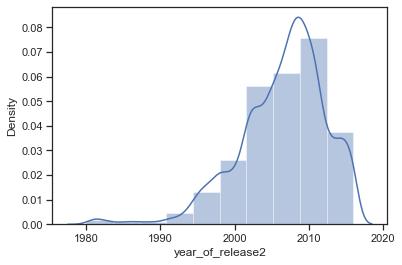

In [67]:
# Checking
sns.distplot(data['year_of_release2'], bins=10);

In [68]:
#change data type

#### critic_score (missing values)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16713 non-null  object 
 1   platform          16715 non-null  object 
 2   year_of_release   16715 non-null  int32  
 3   year_of_release2  16569 non-null  float64
 4   genre             16713 non-null  object 
 5   na_sales          16715 non-null  float64
 6   eu_sales          16715 non-null  float64
 7   jp_sales          16715 non-null  float64
 8   other_sales       16715 non-null  float64
 9   critic_score      8137 non-null   float64
 10  user_score        7590 non-null   float64
 11  user_score2       8689 non-null   float64
 12  rating            9949 non-null   object 
dtypes: float64(8), int32(1), object(4)
memory usage: 1.6+ MB


In [70]:
# Creating a table to recover the critic_score
#agg func is max because we'll take the bigger year and not 0s (years)
critic_score = data.pivot_table(index=['name'], values='critic_score', aggfunc = np.nanmean).reset_index()

In [71]:
critic_score_dict = critic_score.set_index('name').to_dict()
critic_score_dict = critic_score_dict['critic_score']

In [72]:
def recover_critic_score(row):
    name = row['name']
    critic_score= row['critic_score']
    
    if pd.isnull(critic_score):
        if name in critic_score_dict:
            return critic_score_dict[name]
        else:
            return np.nan #turn to 0 and investigate
    else:
        return critic_score
    
data['critic_score2'] = data.apply(recover_critic_score, axis=1)

C:\Users\ELIAS\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [73]:
data.head()

,name,platform,year_of_release,year_of_release2,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score2,rating,critic_score2
0,Wii Sports,Wii,2006,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,8.0,E,76.0
1,Super Mario Bros.,NES,1985,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,8.3,E,82.0
3,Wii Sports Resort,Wii,2009,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,8.0,E,80.0
4,Pokemon Red/Pokemon Blue,GB,1996,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN


In [74]:
#The non nulls values in the two year_of_release columns do not make since, see below the further investgation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16713 non-null  object 
 1   platform          16715 non-null  object 
 2   year_of_release   16715 non-null  int32  
 3   year_of_release2  16569 non-null  float64
 4   genre             16713 non-null  object 
 5   na_sales          16715 non-null  float64
 6   eu_sales          16715 non-null  float64
 7   jp_sales          16715 non-null  float64
 8   other_sales       16715 non-null  float64
 9   critic_score      8137 non-null   float64
 10  user_score        7590 non-null   float64
 11  user_score2       8689 non-null   float64
 12  rating            9949 non-null   object 
 13  critic_score2     9098 non-null   float64
dtypes: float64(9), int32(1), object(4)
memory usage: 1.7+ MB


In [75]:
#We should make the 0's back to nulls
data[(data['year_of_release2'].isnull()) & (~data['year_of_release'].isnull())]

,name,platform,year_of_release,year_of_release2,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score2,rating,critic_score2
475,wwe Smackdown vs. Raw 2006,PS2,0,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,NaN,NaN
627,Rock Band,X360,0,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,8.2,T,92.0
657,Frogger's Adventures: Temple of the Frog,GBA,0,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,NaN,E,73.0
805,Rock Band,Wii,0,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,6.3,T,80.0
1142,Rock Band,PS3,0,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,8.4,T,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,0,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,8.2,E10+,86.0
16288,Shorts,DS,0,NaN,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,E10+,NaN
16348,Agarest Senki: Re-appearance,PS3,0,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,0,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [76]:
data['year_of_release'] = data['year_of_release'].where(data['year_of_release'] != 0, np.nan)

C:\Users\ELIAS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
# now the two columns missing values numbers make since.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16713 non-null  object 
 1   platform          16715 non-null  object 
 2   year_of_release   16446 non-null  float64
 3   year_of_release2  16569 non-null  float64
 4   genre             16713 non-null  object 
 5   na_sales          16715 non-null  float64
 6   eu_sales          16715 non-null  float64
 7   jp_sales          16715 non-null  float64
 8   other_sales       16715 non-null  float64
 9   critic_score      8137 non-null   float64
 10  user_score        7590 non-null   float64
 11  user_score2       8689 non-null   float64
 12  rating            9949 non-null   object 
 13  critic_score2     9098 non-null   float64
dtypes: float64(10), object(4)
memory usage: 1.8+ MB


In [78]:
data.columns

Index(['name', 'platform', 'year_of_release', 'year_of_release2', 'genre',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score',
       'user_score', 'user_score2', 'rating', 'critic_score2'],
      dtype='object')

In [79]:
# Moving the column to the left
cols_order = ['name', 'platform', 'year_of_release', 'year_of_release2', 'genre', 'na_sales', 
              'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'critic_score2',
       'user_score', 'user_score2', 'rating']
data = data[cols_order]
data.head()

,name,platform,year_of_release,year_of_release2,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_score2,user_score,user_score2,rating
0,Wii Sports,Wii,2006.0,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,76.0,8.0,8.0,E
1,Super Mario Bros.,NES,1985.0,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,82.0,8.3,8.3,E
3,Wii Sports Resort,Wii,2009.0,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,8.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN


In [80]:
data.critic_score2.isnull().sum()

7617

In [81]:
data.critic_score.isnull().sum()

8578

I recovered 8578 - 7617 = 961 cells

In [82]:
8578 - 7617

961

### Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [83]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Step 3. Analyze the data

### Look at how many games were released in different years. Is the data for every period significant?

In [84]:
games_years = data[['year_of_release2', 'name']].groupby('year_of_release2').count().sort_values(by='year_of_release2').reset_index()

In [85]:
games_years = games_years[games_years['year_of_release2'] !=0 ]
games_years.head()

,year_of_release2,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14


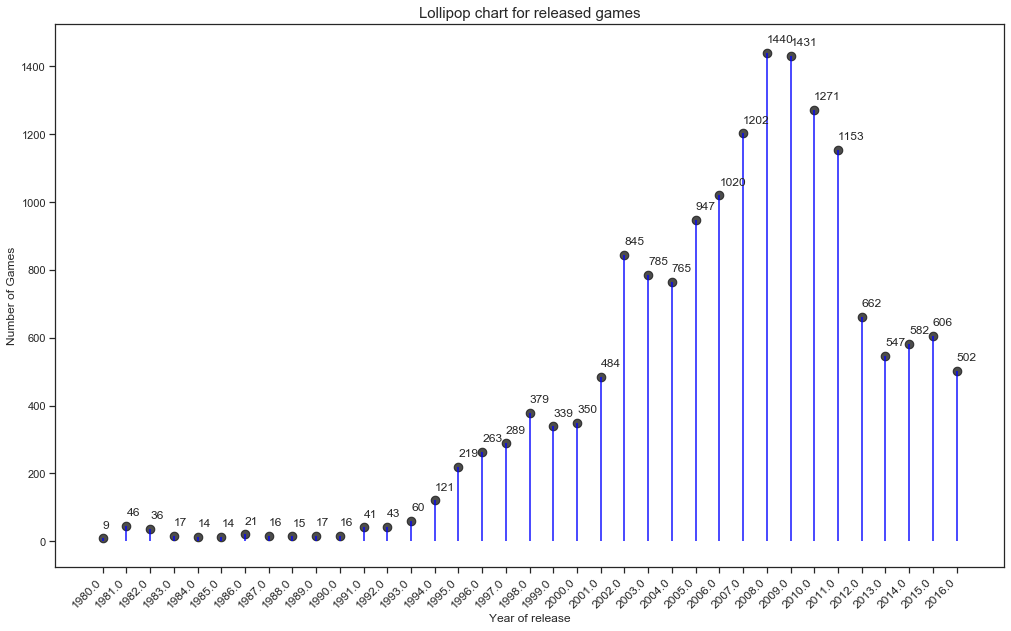

In [86]:
#Lollipop chart for released games
fig,ax=plt.subplots(figsize=(17, 10))
ax.vlines(x=games_years.year_of_release2, ymin=0, ymax=games_years.name, color='blue', alpha=0.7, linewidth=2)
ax.scatter(x=games_years.year_of_release2, y=games_years.name, s=75, color='black', alpha=0.7)

ax.set_title('Lollipop chart for released games', fontdict = {'size':15})
ax.set_ylabel('Number of Games')
ax.set_xlabel('Year of release')
ax.set_xticks(games_years.year_of_release2)
ax.set_xticklabels(games_years.year_of_release2, rotation=45, fontdict={'horizontalalignment': 'right','size':12});

for row in games_years.itertuples():
    ax.text(row.year_of_release2, row.name+30, s=round(row.name,2))

### Look at how sales varied from platform to platform.

starting with the first part; Look at how sales varied from platform to platform

In [87]:
platforms_sales = data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales').reset_index()

In [88]:
platforms_sales.head(10)

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,30.77
9,SAT,33.59


I will be calculating the z_score so we can builda diverging graph later and then categorize them into successful and unsuccessful

In [89]:
# Calculating the z_score value for the total sales column
#platforms_sales.nlargest(5,['total_sales'])
platforms_sales['sales_z'] = (platforms_sales['total_sales'] - platforms_sales['total_sales'].mean())/platforms_sales['total_sales'].std() 

In [90]:
#Negative sales_z means that the sales is below the mean, and positive means the sales above the mean.
print(platforms_sales.head())
print(platforms_sales.tail())

  platform  total_sales   sales_z
0     PCFX         0.03 -0.825980
1       GG         0.04 -0.825952
2      3DO         0.10 -0.825779
3     TG16         0.16 -0.825607
4       WS         1.42 -0.821988
   platform  total_sales   sales_z
26       DS       806.12  1.489304
27      Wii       907.51  1.780520
28      PS3       939.65  1.872834
29     X360       971.42  1.964085
30      PS2      1255.77  2.780807


In [91]:
# categorziing successful and unsuccessful sales
platforms_sales['colors']  = ['red' if row<0 else 'green' for row in platforms_sales['sales_z']]

In [92]:
print(platforms_sales.head())
print(platforms_sales.tail())

  platform  total_sales   sales_z colors
0     PCFX         0.03 -0.825980    red
1       GG         0.04 -0.825952    red
2      3DO         0.10 -0.825779    red
3     TG16         0.16 -0.825607    red
4       WS         1.42 -0.821988    red
   platform  total_sales   sales_z colors
26       DS       806.12  1.489304  green
27      Wii       907.51  1.780520  green
28      PS3       939.65  1.872834  green
29     X360       971.42  1.964085  green
30      PS2      1255.77  2.780807  green


As we can see below, in the diverging bar charts of the total_sales; the colors represent the deviation from the mean.
The *green* bars represent *above* average total_sales deviation -These are the *leaders* of the game platform indusrty
The *red* bars represent *below* average total_sales deviation -These are the *losers* of the game platform indusrty

[Text(0, 0.5, 'platform'), Text(0.5, 0, 'Total_sales_z_Score')]

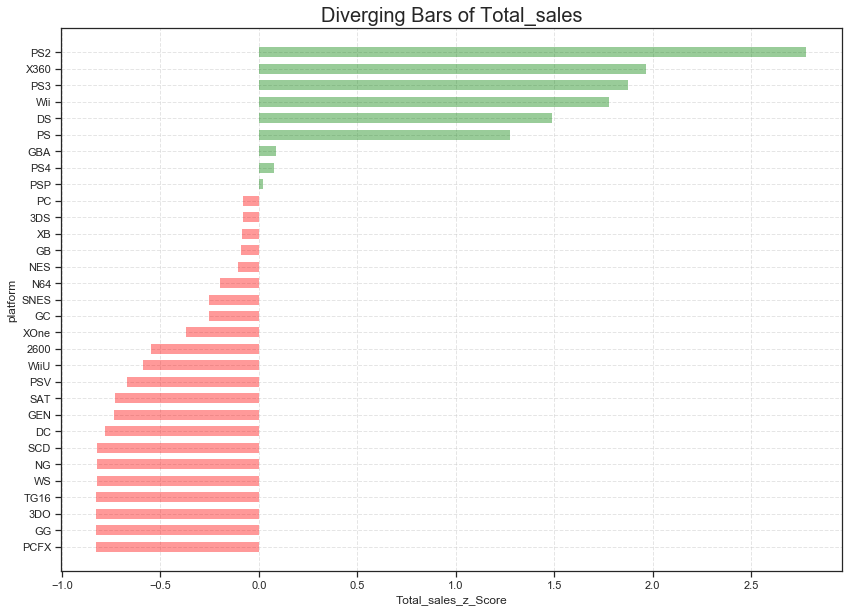

In [93]:
# Building a diverging bar charts
plt.figure(figsize=(14,10))
plt.hlines(y=platforms_sales.platform, xmin=0, xmax=platforms_sales.sales_z, color=platforms_sales.colors, alpha=0.4, linewidth=10)

# Decorations
plt.title('Diverging Bars of Total_sales', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.gca().set(ylabel='platform', xlabel='Total_sales_z_Score')

### Choose the platforms with the greatest total sales and build a distribution based on data for each year. 

Treemap would be a great way to vizulaize the platforms with the greatest total sales, and then we can choose the top 5 platforms and build a distribution based on data for each year

In [94]:
platforms_sales_tree = data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales').reset_index()
#cutting all sales which are equal to 0
platforms_sales_tree = platforms_sales_tree[platforms_sales_tree['total_sales']!=0]

In [95]:
# Creating a list out of the toal_sales values fo the platforms_sales_tree dataframe
platforms_sales_sizes = platforms_sales_tree.total_sales.values.tolist()
#Represinging the sizes for each platform
platforms_sales_sizes

[0.03,
 0.04,
 0.1,
 0.16,
 1.42,
 1.4400000000000004,
 1.8600000000000003,
 15.95,
 30.770000000000003,
 33.59000000000002,
 54.070000000000135,
 82.19,
 96.98000000000003,
 159.32,
 198.93000000000066,
 200.04000000000022,
 218.67999999999984,
 251.0499999999999,
 255.4599999999999,
 257.7399999999991,
 258.99999999999864,
 259.5199999999979,
 294.0499999999952,
 314.1399999999991,
 317.84999999999854,
 730.8599999999957,
 806.119999999985,
 907.5099999999959,
 939.6499999999982,
 971.419999999998,
 1255.7699999999925]

In [96]:
#apply lambda x, means applying it for each row (x) 
#"x[0]" stands for the first column (platform)
# "\n" add seprate line
# $ adding a $ sign as it's the sale currency
#"x[1]" stands for the second column (total_sales)
#axis=1 apply accross the columns 
platforms_sales_sizes_labels = platforms_sales_tree.apply(lambda x: str(x[0])+"\n"+"$"+str(round(x[1])), axis=1)
platforms_sales_sizes_labels

0       PCFX\n$0
1         GG\n$0
2        3DO\n$0
3       TG16\n$0
4         WS\n$1
5         NG\n$1
6        SCD\n$2
7        DC\n$16
8       GEN\n$31
9       SAT\n$34
10      PSV\n$54
11     WiiU\n$82
12     2600\n$97
13    XOne\n$159
14      GC\n$199
15    SNES\n$200
16     N64\n$219
17     NES\n$251
18      GB\n$255
19      XB\n$258
20     3DS\n$259
21      PC\n$260
22     PSP\n$294
23     PS4\n$314
24     GBA\n$318
25      PS\n$731
26      DS\n$806
27     Wii\n$908
28     PS3\n$940
29    X360\n$971
30    PS2\n$1256
dtype: object

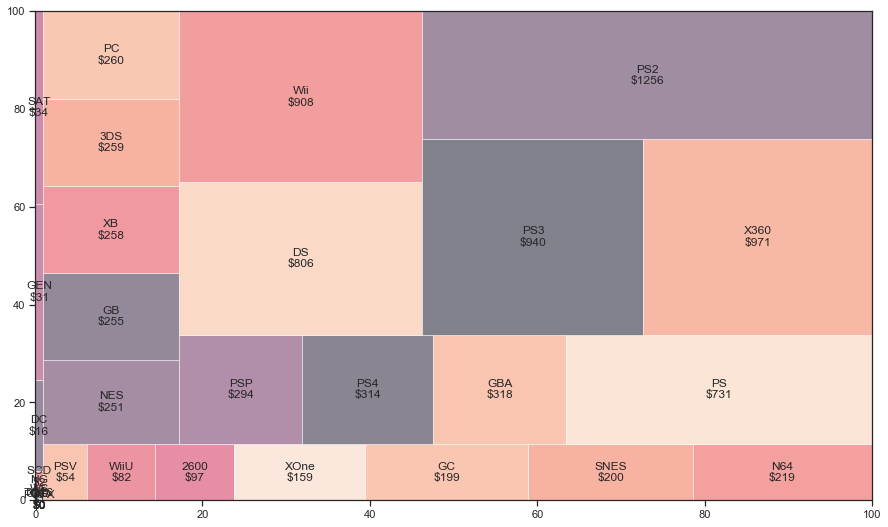

In [97]:
plt.figure(figsize=(15,9))
squarify.plot(sizes=platforms_sales_sizes, label = platforms_sales_sizes_labels, alpha=0.5)

In [98]:
platforms_sales_tree

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,30.77
9,SAT,33.59


The below table summarize the top-5 platforms with the greatest total sales

In [99]:
# Choosing the top-5 platforms with the greatest total sales
top_5_platforms = platforms_sales_tree.nlargest(5,['total_sales'])
top_5_platforms

,platform,total_sales
30,PS2,1255.77
29,X360,971.42
28,PS3,939.65
27,Wii,907.51
26,DS,806.12


In order to build a distribution for the top_5_platforms data for each year, I have to have the following into one data frame:
1. top_5_platforms' platform column
2. (Not necessary)name of the game for the each of the platforms
3. year_of_release for each of the games 
4. total_sales for each of the games 

In [100]:
#Creating a new data frame and merging to it relevant columns

#Staring with working on the top_5_platforms and saving the top 5 platforms into one dataframe
top_5_platforms_years = top_5_platforms.copy()

In [101]:
# #Search for more vis tools in the sns link and bring the right graph and plot the 
# #relationshio between total_sales year_of_release
# sns.distplot(top_5_platforms_years['total_sales'], bins=10);

In [102]:
# Creating a data slice of the top_5_platforms
top_5_platforms_years = data.query('platform ==["PS2", "X360", "PS3", "Wii", "DS"]')
top_5_platforms_years

,name,platform,year_of_release,year_of_release2,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_score2,user_score,user_score2,rating,total_sales
0,Wii Sports,Wii,2006.0,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,76.0,8.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,82.0,8.3,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,8.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,89.0,8.5,8.5,E,29.80
7,Wii Play,Wii,2006.0,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,58.0,6.6,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009.0,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008.0,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,0.01


The below graph present the distribution of both year_of_release and total_sales in the "top_5_platforms_years" data frame.
In order to make this better, I will remove the outliers and unusual values in the next steps.

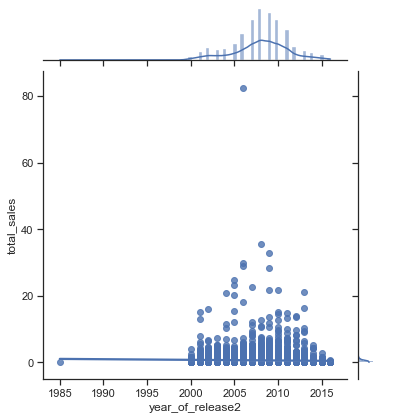

In [103]:
sns.jointplot(x="year_of_release2", y="total_sales", data=top_5_platforms_years, kind="reg");

In [104]:
#Keeping total_sales below 40, and year_of_release2 above 2000
top_5_platforms_years = top_5_platforms_years.query('total_sales < 40')
top_5_platforms_years = top_5_platforms_years.query('year_of_release2 >= 2000')

Distribution of both "year_of_release2" and the "total_sales *per game*" in $ of the top 5 platforms;

Insights summary:

1. Games releases peaked between 2017 and 2012. (They used to lunch more games back then)
2. Most people paid between 1-5 $ per games

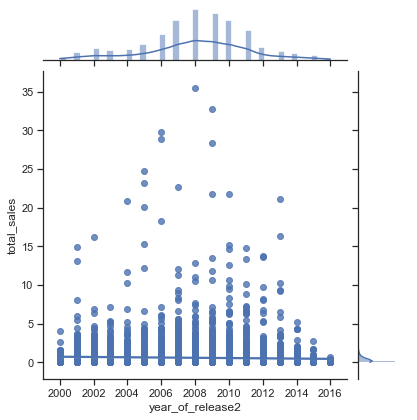

In [105]:
sns.jointplot(x="year_of_release2", y="total_sales", data=top_5_platforms_years, kind="reg");

### Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [106]:
top_5_platforms_years

,name,platform,year_of_release,year_of_release2,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_score2,user_score,user_score2,rating,total_sales
2,Mario Kart Wii,Wii,2008.0,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,82.0,8.3,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,8.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,89.0,8.5,8.5,E,29.80
7,Wii Play,Wii,2006.0,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,58.0,6.6,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,87.0,8.4,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009.0,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008.0,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,0.01


Comparing different platforms' year_of_release and total_sales:
As we can see, all of sales' mean of each of theplatforms throughout the year the games was release are on a  downtrend, this ofcourse make sense because the sales of the product goes up when the games are released on the platform, then sales gradually start to shrik with time.

One of them seem to actually go to 0, which is the PS2, this make sense because PS3 was also released, and throughout the time, gaming companies start to gradually move the game stores to the newer produt. In business it's called: Product life-cycle management.

In the case of PS2, it took almost 12 years until the product life-cycle ended.

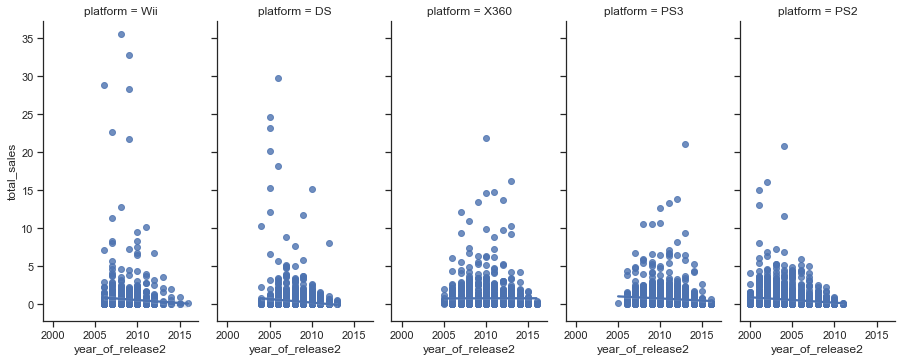

In [107]:
sns.lmplot(x="year_of_release2", y="total_sales", col="platform", data=top_5_platforms_years,
           aspect=.5)

In [108]:
#Extras
# # Removing unusual total_sales values and plotting again
# top_5_platforms_years = top_5_platforms_years.query('total_sales < 10')
# sns.lmplot(x="year_of_release", y="total_sales", col="platform", data=top_5_platforms_years,
#            aspect=.5);

### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

Determine what period you should take data for - Anything above 1999, this question have been addressed above already

In [109]:
data.year_of_release2.value_counts()

2008.0    1440
2009.0    1431
2010.0    1271
2007.0    1202
2011.0    1153
2006.0    1020
2005.0     947
2002.0     845
2003.0     785
2004.0     765
2012.0     662
2015.0     606
2014.0     582
2013.0     547
2016.0     502
2001.0     484
1998.0     379
2000.0     350
1999.0     339
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release2, dtype: int64

### Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [110]:
# Seeing how much data do we have in each year
data.year_of_release2.value_counts()

2008.0    1440
2009.0    1431
2010.0    1271
2007.0    1202
2011.0    1153
2006.0    1020
2005.0     947
2002.0     845
2003.0     785
2004.0     765
2012.0     662
2015.0     606
2014.0     582
2013.0     547
2016.0     502
2001.0     484
1998.0     379
2000.0     350
1999.0     339
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release2, dtype: int64

1999 was a turning point, there was not much data prior to 1999, so I will keep anything above 1999 (including 1999) 

In [111]:
# Seeing the persetnage in which I will drop, it's around 10%
len(data.query('year_of_release2 < 1999'))/len(data)

0.09799581214478013

In [112]:
# Dropping anything below 1999
data = data.query('year_of_release2 >= 1999')

### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
Which platforms are leading in sales? - Answered previously; here's the top 5 sales leaders; Wii, DS, X360, PS3, and PS2.

Which ones are growing or shrinking? - All of them platforms' "change in sales" will shrik overtime, this is because the industry's Product life-cycle; to elaborate, It is the conditions in which a product is sold changes over time and must be managed as it moves through its succession of stage.

Select several potentially profitable platforms. I will answer this after plotting the heatmap of the changes in sales overtime.

In [113]:
sales_leaders = data.copy()

In [114]:
#Creatinga pivot table which represent the platform sales (summing the sales for each platform) in each of the years
sales_leaders_pivot = pd.pivot_table(sales_leaders, index='year_of_release2', columns='platform', values='total_sales', aggfunc=sum, fill_value=0)

In [115]:
sales_leaders_pivot

platform,2600,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,...,PSP,PSV,SAT,SNES,WS,Wii,WiiU,X360,XB,XOne
year_of_release2,,,,,,,,,,,,,,,,,,,,,
1999.0,0.00,0.00,5.16,0.00,38.00,0.00,0.00,58.01,4.74,144.53,...,0.00,0.00,0.09,0.26,0.46,0.00,0.00,0.00,0.00,0.00
2000.0,0.00,0.00,5.99,0.00,19.76,0.07,0.00,33.97,4.66,96.37,...,0.00,0.00,0.00,0.00,0.68,0.00,0.00,0.00,0.99,0.00
2001.0,0.00,0.00,1.07,0.00,9.24,61.53,26.62,3.25,5.47,35.59,...,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,22.84,0.00
2002.0,2.53,0.00,0.29,0.00,0.00,74.16,52.22,0.08,8.57,6.67,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.76,0.00
2003.0,0.00,0.00,0.00,0.00,0.00,56.67,51.20,0.00,8.89,2.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,56.27,0.00
2004.0,0.00,0.00,0.00,17.27,0.00,77.91,28.89,0.33,10.39,0.00,...,7.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.97,0.00
2005.0,0.00,0.00,0.00,130.14,0.00,34.53,27.91,0.00,4.38,0.00,...,43.84,0.00,0.00,0.00,0.00,0.00,0.00,9.22,49.09,0.00
2006.0,0.00,0.00,0.00,119.81,0.00,5.46,11.55,0.00,2.85,0.00,...,56.28,0.00,0.00,0.00,0.00,140.19,0.00,51.79,10.04,0.00
2007.0,0.00,0.00,0.02,147.23,0.00,3.40,0.27,0.00,9.28,0.00,...,47.30,0.00,0.00,0.00,0.00,153.41,0.00,95.41,0.55,0.00


In [116]:
#Using the shift method to calculate the change in sales throughout the years for each platform ( change in sales for each platform overtime)
#Shifting the firt row down (In order to shift accross column, specify the following .shift(+1, axis=1))
#print(sales_leaders_pivot.shift(+1).head())
sales_leaders_pivot.shift(+1).tail()

platform,2600,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,...,PSP,PSV,SAT,SNES,WS,Wii,WiiU,X360,XB,XOne
year_of_release2,,,,,,,,,,,,,,,,,,,,,
2012.0,0.0,63.20,0.0,26.33,0.0,0.0,0.0,0.0,35.16,0.0,...,17.82,4.63,0.0,0.0,0.0,59.79,0.00,145.23,0.0,0.00
2013.0,0.0,51.76,0.0,11.67,0.0,0.0,0.0,0.0,23.45,0.0,...,7.95,16.19,0.0,0.0,0.0,22.94,17.56,100.72,0.0,0.00
2014.0,0.0,56.57,0.0,1.54,0.0,0.0,0.0,0.0,12.66,0.0,...,3.38,10.59,0.0,0.0,0.0,8.59,21.65,88.58,0.0,18.96
2015.0,0.0,43.76,0.0,0.00,0.0,0.0,0.0,0.0,13.63,0.0,...,0.24,11.90,0.0,0.0,0.0,3.75,22.03,34.74,0.0,54.07
2016.0,0.0,27.78,0.0,0.00,0.0,0.0,0.0,0.0,8.52,0.0,...,0.12,6.25,0.0,0.0,0.0,1.14,16.35,11.96,0.0,60.14


In [117]:
#Through the shift method, we can calculate the drop of the sales for each platform through out the years
dynamics_platform_sales  = sales_leaders_pivot - sales_leaders_pivot.shift(+1)
dynamics_platform_sales.tail()

platform,2600,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,...,PSP,PSV,SAT,SNES,WS,Wii,WiiU,X360,XB,XOne
year_of_release2,,,,,,,,,,,,,,,,,,,,,
2012.0,0.0,-11.44,0.0,-14.66,0.0,0.0,0.0,0.0,-11.71,0.0,...,-9.87,11.56,0.0,0.0,0.0,-36.85,17.56,-44.51,0.0,0.00
2013.0,0.0,4.81,0.0,-10.13,0.0,0.0,0.0,0.0,-10.79,0.0,...,-4.57,-5.60,0.0,0.0,0.0,-14.35,4.09,-12.14,0.0,18.96
2014.0,0.0,-12.81,0.0,-1.54,0.0,0.0,0.0,0.0,0.97,0.0,...,-3.14,1.31,0.0,0.0,0.0,-4.84,0.38,-53.84,0.0,35.11
2015.0,0.0,-15.98,0.0,0.00,0.0,0.0,0.0,0.0,-5.11,0.0,...,-0.12,-5.65,0.0,0.0,0.0,-2.61,-5.68,-22.78,0.0,6.07
2016.0,0.0,-12.64,0.0,0.00,0.0,0.0,0.0,0.0,-3.27,0.0,...,-0.12,-2.00,0.0,0.0,0.0,-0.96,-11.75,-10.44,0.0,-33.99


In [118]:
#Transposing: Switching the table columns and rows
dynamics_platform_sales.T

year_of_release2,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,
2600,NaN,0.00,0.00,2.53,-2.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,62.88,-11.44,4.81,-12.81,-15.98,-12.64
DC,NaN,0.83,-4.92,-0.78,-0.29,0.00,0.00,0.00,0.02,0.02,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,NaN,0.00,0.00,0.00,0.00,17.27,112.87,-10.33,27.42,-1.87,-25.80,-34.21,-59.02,-14.66,-10.13,-1.54,0.00,0.00
GB,NaN,-18.24,-10.52,-9.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,NaN,0.07,61.46,12.63,-17.49,21.24,-43.38,-29.07,-2.06,-3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,NaN,0.00,26.62,25.60,-1.02,-22.31,-0.98,-16.36,-11.28,-0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
N64,NaN,-24.04,-30.72,-3.17,-0.08,0.33,-0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PC,NaN,-0.08,0.81,3.10,0.32,1.50,-6.01,-1.53,6.43,3.18,4.59,9.10,9.01,-11.71,-10.79,0.97,-5.11,-3.27


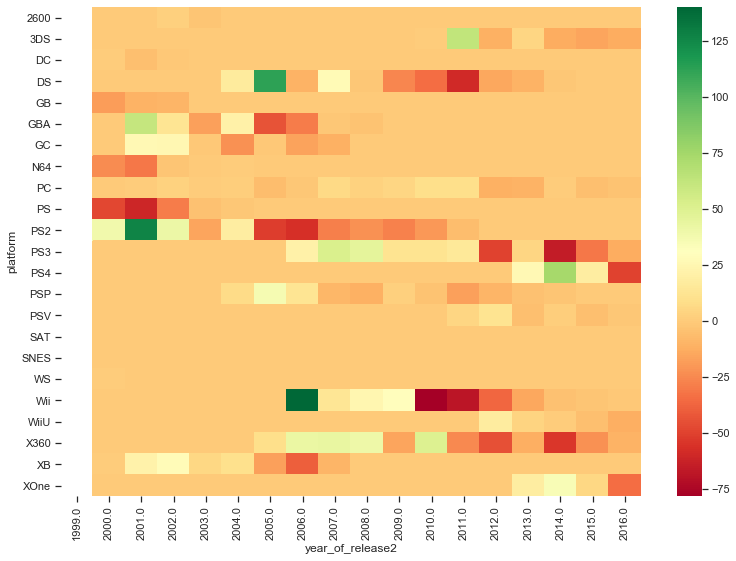

In [119]:
#Creating a heatmap to visualize the result (to vizualize the change in sales for each platform overtime)
plt.figure(figsize=(13,9))
sns.heatmap(dynamics_platform_sales.T, cmap ="RdYlGn" );

To answer the third part of the question "Select several potentially profitable platforms"; Here's 3 example of "potentially profitable platforms"


PS2: Strong sales when the product was lunched in 1999, peaked in 2000, gradually increased until 2003, then the change in sales shrinked, but what was surprising that the sales grow in 2004 after it shrinked in 2003. This is a strong insight that the product was relevant for serveral years in a row.

PS3: Long life cycle where the change in sales grow in the first 5 years (between 2006-2011), it grow but in a lower frecuency. Then in 2012 the platform's change in sale shrinked radically, but then came back in 2013 and then dropped again.

Wii: the difference in sales was gradually shrinking between 2006 until 2009, this is great because unlike other platforms, we noticed radical change in color from green to red (which is common in this indstury), then naturally it dropped in 2010; that was the end of the product life-cycle


### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [120]:
# Game A - Xbox = 10
# Game A - Wii = nan
# np.mean() = 'nan'
# np.nanmean() = 10

In [121]:
a = 12
pd.isnull(a)

False

In [122]:
# In order to plot a box plot for all the games broken down by the platform ordered by sales, 
#I will group the data by platforms and name (games)  
platform_grouped = data.groupby(['platform','name'])['total_sales'].sum().reset_index()

In [123]:
platform_grouped

,platform,name,total_sales
0,2600,Space Invaders,2.53
1,3DS,12-Sai. Honto no Kimochi,0.07
2,3DS,12-Sai. Koisuru Diary,0.05
3,3DS,3DS Classic Collection,0.03
4,3DS,50 Classic Games,0.01
...,...,...,...
14922,XOne,XCOM 2,0.04
14923,XOne,ZombiU,0.01
14924,XOne,Zombie Army Trilogy,0.11
14925,XOne,Zoo Tycoon (2013),0.36


In [124]:
#Making an ordered list
#ordering means brining the sum of all games in the same platform and making a unique value of each game in each platform, 
# and then ORDERING the total_sales sum from the least profitable to the most profitable
ordered_games = platform_grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()

In [125]:
#Accessing the platform list
ordered_platform = platform_grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
ordered_platform

0      SAT
1     SNES
2       WS
3     2600
4       DC
5      PSV
6       GB
7     WiiU
8      N64
9     XOne
10      GC
11      PC
12      XB
13     3DS
14      PS
15     PSP
16     GBA
17     PS4
18      DS
19     Wii
20     PS3
21    X360
22     PS2
Name: platform, dtype: object

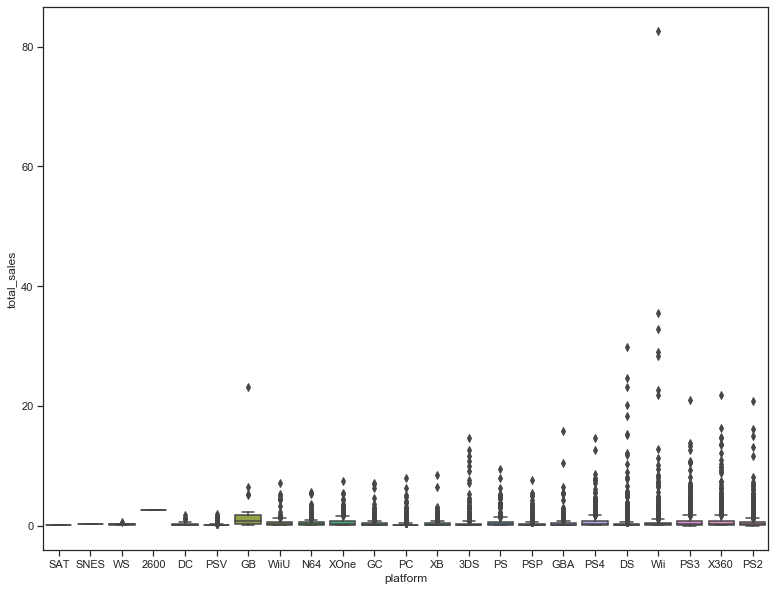

In [126]:
#Plotting
plt.figure(figsize=(13,10))
sns.boxplot(x='platform', y='total_sales', data=platform_grouped, order=ordered_platform)

In [127]:
#Removing outliers by slicing and keeping anything below 20 to see if the graph looks better
platform_grouped_20 = platform_grouped.query('total_sales <= 20')

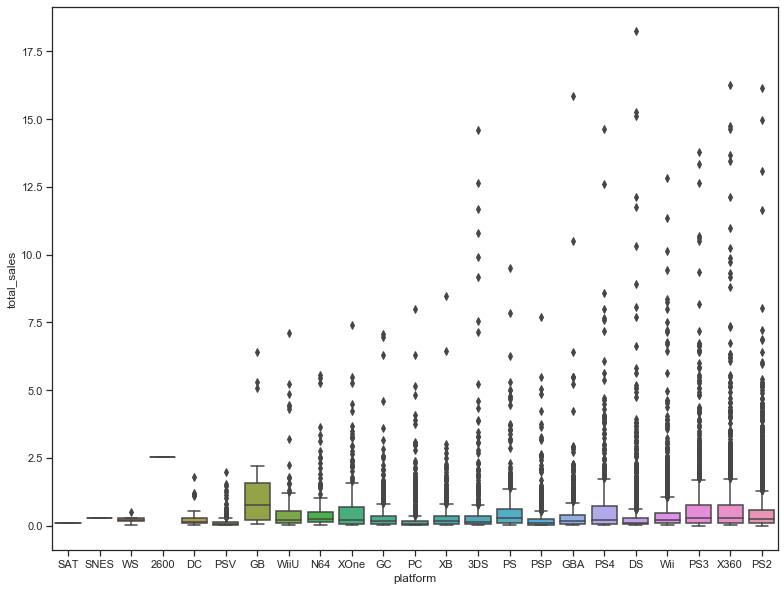

In [128]:
#Plotting
plt.figure(figsize=(13,10))
sns.boxplot(x='platform', y='total_sales', data=platform_grouped_20, order=ordered_platform)

As we can see above, there are lots of outlier values in the total_sales for the big players, that's why this graph does not look the most beautiful

In [129]:
platform_grouped['total_sales'].describe()

count    14927.000000
mean         0.500132
std          1.465049
min          0.000000
25%          0.060000
50%          0.160000
75%          0.440000
max         82.540000
Name: total_sales, dtype: float64

To make teh above plot look better, I will remove outliners of total_ sales using the 1.5IQR rule:

1.5(IQR) rule: 1.5*(Q3-Q1) = 1.5*(0.44-0.05) = 0.585

Lower outliers: Q1-0.585 = 0.05 - 0.585 = (irrelevant in our case)

Upper outliers: Q3+45 = 0.44 + 0.585 = 1.025

In [130]:
platform_grouped_IQR = platform_grouped.query('total_sales <= 1.025')

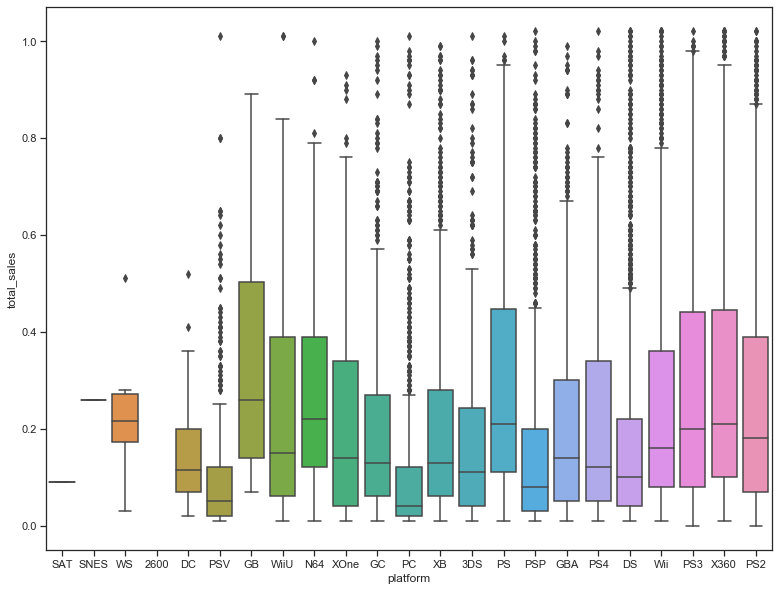

In [131]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform', y='total_sales', data=platform_grouped_IQR, order=ordered_platform);

 *Are the differences in sales significant?

yes, leading platforms had more sales significant,leading platforms like DS Wii, Ps3, X360, and Ps2.
the more to the right you go, the more the platform is consiered a leader, (a platform is considered a leader if they had higher total_sale revenues than most of the platforms. 
These leaders had a more outliers than other platforms, which means selling games for the same platform for unusal prices comparied to differet platforms. This answer can be clearer if you look at the previous boxplot, not the above one because I've user 1.5IQR rule which removed lots of the outliners for the big players.
 
 *What about average sales on various platforms? 
 
Median of most platform is below the mean in most of the platforms. In other words, most platforms have right-skewed distributions; these are also called are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line, in our case, the outliners of the total_sales in which are way far from the right whisker, they are way above the mean in all platforms and we cannot see any outliners to the left as the games prices.
 
 *Describe your findings.
 1. The medians  of all platforms is in the same range
 2. Median of most platform is below the mean
 3. There are lots of outliers  in most of the platforms, which means that all plaftorms were able to sell the same platforms games in higher prices.
 
 means that the sale of the games of the platforms did not happen in one region only, and they tried to sell it in a higher prices 

### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Selecting PS2

In [132]:
# I am choosing PS2 platform, and makign a data frame for it
ps2 = data.query('platform == "PS2"')
ps2.head()

,name,platform,year_of_release,year_of_release2,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_score2,user_score,user_score2,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004.0,2004.0,Action,9.43,0.40,0.41,10.57,95.0,95.0,9.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002.0,2002.0,Action,8.41,5.49,0.47,1.78,95.0,95.0,8.7,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001.0,2001.0,Racing,6.85,5.09,1.87,1.16,95.0,95.0,8.4,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001.0,2001.0,Action,6.99,4.51,0.30,1.30,97.0,97.0,8.5,8.5,M,13.10
48,Gran Turismo 4,PS2,2004.0,2004.0,Racing,3.01,0.01,1.10,7.53,89.0,89.0,8.5,8.5,E,11.65


#### critic_score (professional review)

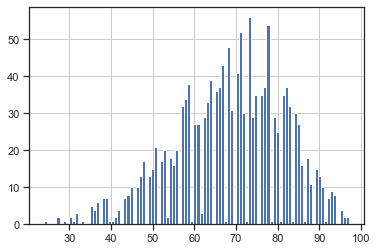

In [133]:
# Investigating critic_score distribution: left-skewed distribution
ps2['critic_score2'].hist(bins=100);

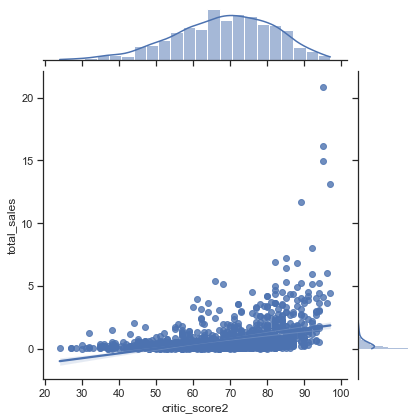

In [134]:
sns.jointplot(x="critic_score2", y="total_sales", data=ps2, kind="reg");

According to the above scatter graph, we can see that critic_score and total_sales have a positive correlation, I've confirmed this with the below coefficient of correlation

In [135]:
#The correlation between the critic_score and total _sales of the PS2 platform is c
print((ps2['critic_score2'].corr(ps2['total_sales'])))

0.388158004043041


Conclusion:
We have a positive correlation of 0.4, the higher the critic_score, the more customers are willing to pay:In other words, the higher the critic_score, the higher sales PS2 generate in sales.

#### user_score (user's review)

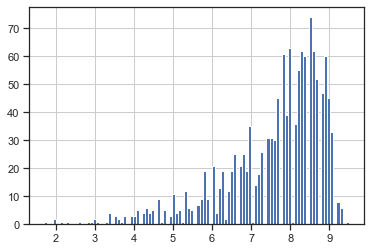

In [136]:
# Investigating user_score distribution: left-skewed distribution
ps2['user_score2'].hist(bins=100);

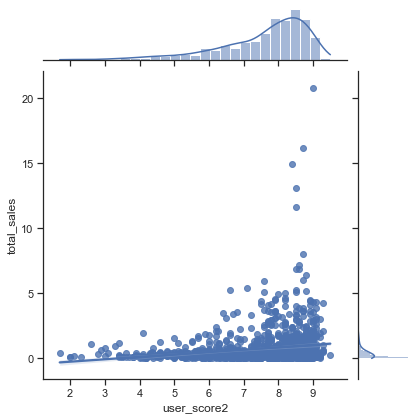

In [137]:
sns.jointplot(x="user_score2", y="total_sales", data=ps2, kind="reg");

Conclusion:
We have a positive correlation of 0.2, the higher the user_score, the more customers are willing to pay:In other words, the higher the user_score, the higher sales PS2 generate in sales.

According to the above scatter graph, we can see that user_score2 and total_sales have a positive correlation, I've confirmed this with the below coefficient of correlation

In [138]:
#The correlation between the user_score and total _sales of the PS2 platform is positive; 0.2
print((ps2['user_score2'].corr(ps2['total_sales'])))

0.17985029072977798


### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

Comparing the platforms's total_sales will do the job. I will compare the top 5 plaforms.
In order to do this, I will use the relevant this data frame which I've used earlier; top_5_platforms_years.
Plotting a bar chart or a simlar style plot will do the job

In [139]:
top_5_platforms_years.head()

,name,platform,year_of_release,year_of_release2,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_score2,user_score,user_score2,rating,total_sales
2,Mario Kart Wii,Wii,2008.0,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,82.0,8.3,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,8.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,89.0,8.5,8.5,E,29.80
7,Wii Play,Wii,2006.0,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,58.0,6.6,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,87.0,8.4,8.4,E,28.32


In [140]:
#The platform leader's 
ordered_platform.tail()

18      DS
19     Wii
20     PS3
21    X360
22     PS2
Name: platform, dtype: object

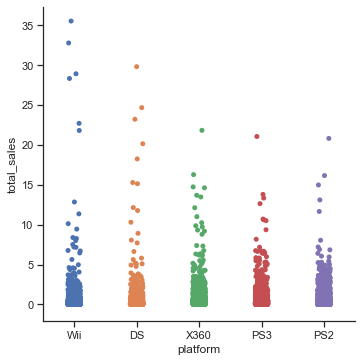

In [141]:
#Headsup: a heavy plot, change to "box" plot kind in case you do not have the time ahaha ("swarm" kind is heavy)
sns.catplot(x="platform", y="total_sales", data=top_5_platforms_years, kind='strip')

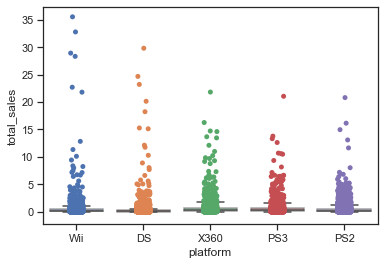

In [142]:
# putting both plots into the same graphs
sns.boxplot(x="platform", y="total_sales", data=top_5_platforms_years, boxprops={'alpha': 0.5}, showfliers=False)
sns.stripplot(x="platform", y="total_sales", data=top_5_platforms_years)
#plt.ylim([0, 5])

(0, 5)

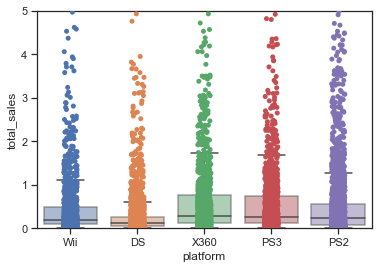

In [143]:
# putting both plots into the same graphs
sns.boxplot(x="platform", y="total_sales", data=top_5_platforms_years, boxprops={'alpha': 0.5}, showfliers=False)
sns.stripplot(x="platform", y="total_sales", data=top_5_platforms_years)
plt.ylim([0, 5])

This is better, now see below the conclustion of these plots.

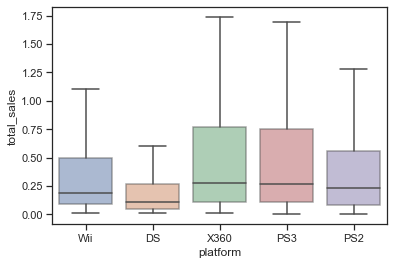

In [144]:
# Box plots for each of the platforms; this helps us understand where does the median dstand for the of the platforms.
sns.boxplot(x="platform", y="total_sales", data=top_5_platforms_years, boxprops={'alpha': 0.5}, showfliers=False)

Conclustion:
The above box plot summary of the top 5 platforms help us understand the following: All of the platforms median are closer to Q1, which indicates a positive skew/right skew (the mean above the median) as most total_sales falls to the right, which we can see that from the long upper whiskers. 

To compare the total_sales distrupbtion using the boxplots, I would conclude that x360 and PS3 have more total_ sales outliers than the other platforms.

In [145]:
#Keep the order in mind when looking into the above plot
top_5_platforms_ordered = top_5_platforms_years.groupby('platform')['total_sales'].mean().sort_values()
top_5_platforms_ordered

platform
DS      0.377942
PS2     0.582785
Wii     0.631362
PS3     0.708477
X360    0.773288
Name: total_sales, dtype: float64

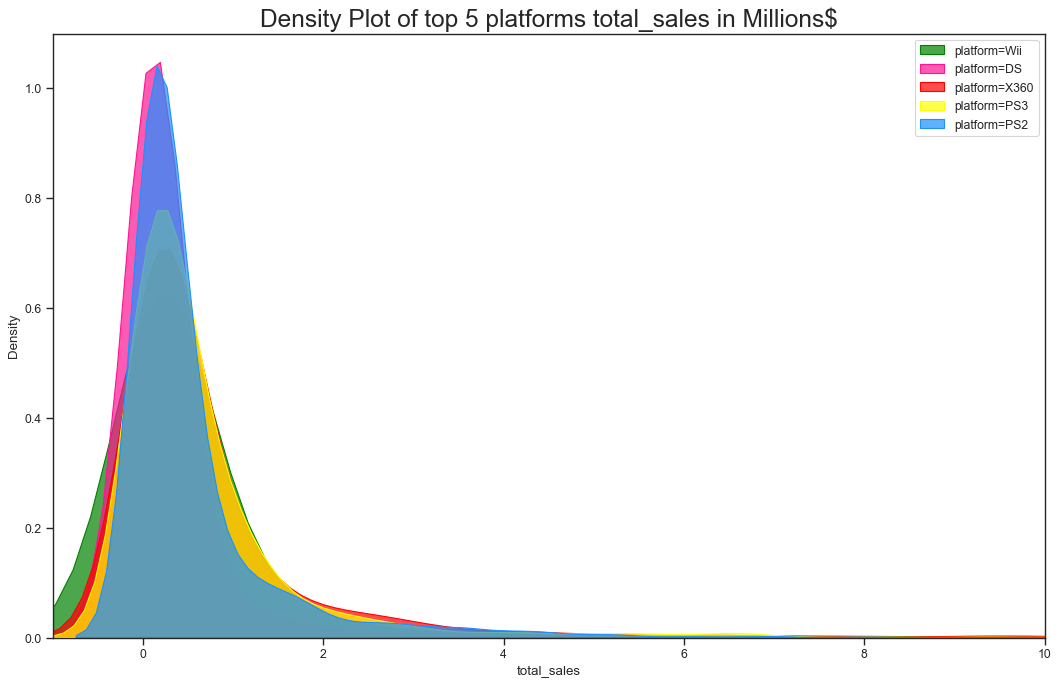

In [146]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(top_5_platforms_years.loc[top_5_platforms_years['platform'] == "Wii", "total_sales"], shade=True, color="Green", label="platform=Wii", alpha=.7)
sns.kdeplot(top_5_platforms_years.loc[top_5_platforms_years['platform'] == "DS", "total_sales"], shade=True, color="deeppink", label="platform=DS", alpha=.7)
sns.kdeplot(top_5_platforms_years.loc[top_5_platforms_years['platform'] == "X360", "total_sales"], shade=True, color="Red", label="platform=X360", alpha=.7)
sns.kdeplot(top_5_platforms_years.loc[top_5_platforms_years['platform'] == "PS3", "total_sales"], shade=True, color="yellow", label="platform=PS3", alpha=.7)
sns.kdeplot(top_5_platforms_years.loc[top_5_platforms_years['platform'] == "PS2", "total_sales"], shade=True, color="dodgerblue", label="platform=PS2", alpha=.7)
#plt.ylim([0, 5])
plt.xlim([-1, 10])

# Decoration
plt.title('Density Plot of top 5 platforms total_sales in Millions$', fontsize=22)
plt.legend()
plt.show()

Another conculsion: The above density graph show the distribution of a continuous variables (total_sales); 

as we saw in the box plotting previously,X360 and PS2 had similar distribution and so here! NOTE that the yellow area (PS3) contain also the red line area (yellow overlaped red) because they have similar density distrubtion) 

### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [147]:
# Group data by genres using pivot_table
genre_sales = data.pivot_table(index=['genre'], values='total_sales', aggfunc='sum').reset_index()

In [148]:
genre_sales

,genre,total_sales
0,Action,1573.00
1,Adventure,191.37
2,Fighting,327.14
3,Misc,743.15
4,Platform,515.70
5,Puzzle,140.19
6,Racing,600.58
7,Role-Playing,781.00
8,Shooter,933.59
9,Simulation,347.37


In [149]:
genre_sales_ordered = genre_sales.sort_values(by='total_sales')
genre_sales_ordered

,genre,total_sales
11,Strategy,134.21
5,Puzzle,140.19
1,Adventure,191.37
2,Fighting,327.14
9,Simulation,347.37
4,Platform,515.70
6,Racing,600.58
3,Misc,743.15
7,Role-Playing,781.00
8,Shooter,933.59


C:\Users\ELIAS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


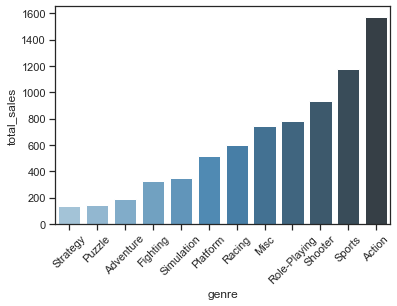

In [150]:
ax = sns.barplot("genre", y="total_sales", data=genre_sales_ordered,
                 palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

As we can see above, action and sports are the most profitable genres, while strategy and puzzle is the least profitable; generally speaking; it seem that people are willing to buy games which brings a rush of adrenaline to their brains, like sports and action. While strategy and puzzle needs lots of patience; user's do not usually get much surprises as action and sports.

# Step 4. Create a user profile for each region
## For each region (NA, EU, JP), determine:

### The top five platforms. Describe variations in their market shares from region to region.

In [151]:
top_five_platforms = data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS"]')
#Describe variations of sales?
top_five_platforms

,name,platform,year_of_release,year_of_release2,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_score2,user_score,user_score2,rating,total_sales
0,Wii Sports,Wii,2006.0,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,76.0,8.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,82.0,8.3,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,8.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,89.0,8.5,8.5,E,29.80
7,Wii Play,Wii,2006.0,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,58.0,6.6,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009.0,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008.0,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,0.01


In [152]:
top_5_platforms_years

,name,platform,year_of_release,year_of_release2,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_score2,user_score,user_score2,rating,total_sales
2,Mario Kart Wii,Wii,2008.0,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,82.0,8.3,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,8.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,89.0,8.5,8.5,E,29.80
7,Wii Play,Wii,2006.0,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,58.0,6.6,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,87.0,8.4,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009.0,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008.0,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,0.01


In [153]:
top_5_platforms_regions = top_5_platforms_years.pivot_table(index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc='sum') #sort_values(by='total_sales')

In [154]:
top_5_platforms_regions

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
DS,188.72,175.00,381.38,804.26
PS2,337.05,137.74,580.09,1247.16
PS3,328.97,79.52,391.60,935.19
Wii,232.52,65.28,452.65,820.77
X360,269.79,12.33,599.15,966.61


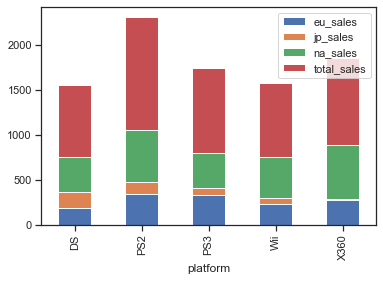

In [155]:
top_5_platforms_regions.plot.bar(stacked=True);

As we can see in the above table and below piecharts, there are different market share in different regions for each platforms.

In the EU region: PS2 and PS3 took the first half

In the JP region: PS2 and PS3 took almost the first half but DS took a teh greatest share

In the NA region: PS2 and PS3 took a bit less than the first half, then X360 and the rest took equal share.

Most of the sales of all platforms came from NA, then some in EU and the rest from JP (exclusing x360).

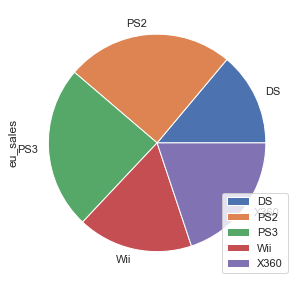

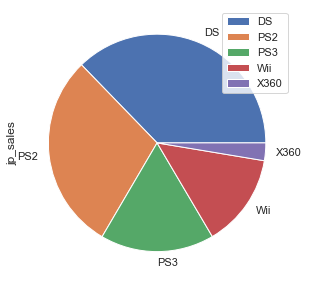

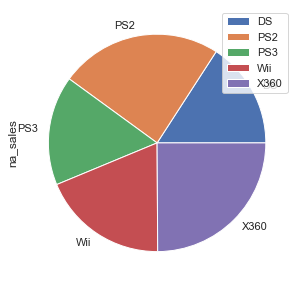

In [156]:
#Plotting a pie chart for each of the regions
plot = top_5_platforms_regions.plot.pie(y='eu_sales', figsize=(5, 5))
plot = top_5_platforms_regions.plot.pie(y='jp_sales', figsize=(5, 5))
plot = top_5_platforms_regions.plot.pie(y='na_sales', figsize=(5, 5))

In [157]:
top_5_platforms_years

,name,platform,year_of_release,year_of_release2,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_score2,user_score,user_score2,rating,total_sales
2,Mario Kart Wii,Wii,2008.0,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,82.0,8.3,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,8.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,89.0,8.5,8.5,E,29.80
7,Wii Play,Wii,2006.0,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,58.0,6.6,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,87.0,8.4,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009.0,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008.0,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,0.01


### The top five genres. Explain the difference.

In [158]:
top_5_platforms_genres = top_5_platforms_years.pivot_table(index=['genre'], values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc='sum').nlargest(5,['total_sales'])
top_5_platforms_genres

,eu_sales,jp_sales,na_sales,total_sales
genre,,,,
Action,307.70,74.89,522.54,1037.46
Sports,224.99,53.19,407.69,780.90
Shooter,188.02,16.67,338.46,613.37
Misc,163.33,61.63,294.16,583.29
Racing,133.96,18.18,183.63,390.00


In [159]:
top_5_platforms_genres

,eu_sales,jp_sales,na_sales,total_sales
genre,,,,
Action,307.70,74.89,522.54,1037.46
Sports,224.99,53.19,407.69,780.90
Shooter,188.02,16.67,338.46,613.37
Misc,163.33,61.63,294.16,583.29
Racing,133.96,18.18,183.63,390.00


As we can see in the above table and below piecharts, the region's user tases seem to have similarities, most of the users are fans of ACtion and Sports, which took a bit more than half of the marketshare, then the rest of the genres have less market share. Shooter genre seem to be popular in EU and and NA while it's not that popular in JB

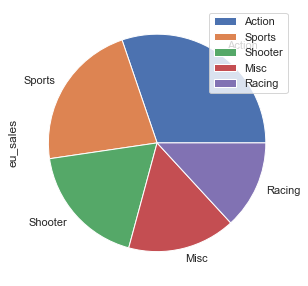

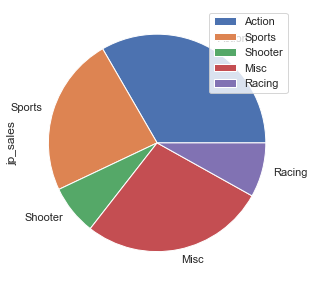

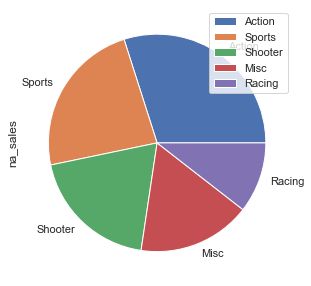

In [160]:
#Plotting a pie chart for each of the genres
plot = top_5_platforms_genres.plot.pie(y='eu_sales', figsize=(5, 5))
plot = top_5_platforms_genres.plot.pie(y='jp_sales', figsize=(5, 5))
plot = top_5_platforms_genres.plot.pie(y='na_sales', figsize=(5, 5))

In [161]:
data

,name,platform,year_of_release,year_of_release2,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_score2,user_score,user_score2,rating,total_sales
0,Wii Sports,Wii,2006.0,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,76.0,8.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,82.0,8.3,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,8.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,89.0,8.5,8.5,E,29.80
7,Wii Play,Wii,2006.0,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,58.0,6.6,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.01


### Do ESRB ratings affect sales in individual regions?

Compare the rev/perstange of each region, split it by the ESRP rating. (no correlation)

In [162]:
#https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [163]:
data.query('rating == "RP"')

,name,platform,year_of_release,year_of_release2,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_score2,user_score,user_score2,rating,total_sales
14270,Supreme Ruler: Cold War,PC,2011.0,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,63.0,6.8,6.8,RP,0.04
16180,WRC: FIA World Rally Championship,PC,NaN,2005.0,Racing,0.0,0.01,0.0,0.00,65.0,65.0,NaN,6.1,RP,0.01


In [164]:
top_5_platforms_rating = data.pivot_table(index=['rating'], values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc='sum') #sort_values(by='total_sales')

In [165]:
top_5_platforms_rating

,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
AO,0.61,0.00,1.26,1.96
E,700.95,191.03,1273.26,2397.68
E10+,188.32,40.20,352.56,654.55
EC,0.11,0.00,1.53,1.75
M,476.34,58.17,732.91,1442.67
RP,0.04,0.00,0.00,0.05
T,405.64,139.50,729.27,1424.79


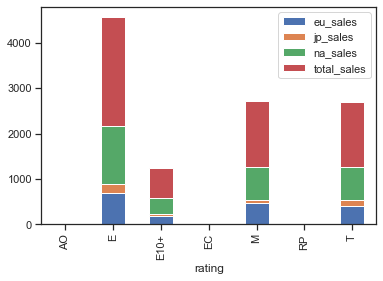

In [166]:
top_5_platforms_rating.plot.bar(stacked=True);

The  ESRB ratings types which we can give a summary on is T, M, E10+, and E;
They all follow the same trend which is the following; NA seem to genrate the most sales for all types of ERSP rating, then the EU region, and lastly comes JP region.

# Step 5. Test the following hypotheses:

### —Average user ratings (user score) of the Xbox One and PC platforms are the same.

Step 1. Set up hypotheses and select the level of significance α.

Ho: The average user ratings of Xbox One equals the average user rating of PC platforms -->  𝜇_1=𝜇_2

H1: The average user ratings of Xbox One does not equals the average user rating of PC platforms (rejecting H0) --> 𝜇_1!=𝜇_2

α = 0.05 # if the p-value is less than alpha, we reject the hypothesis

Step 2. Select the appropriate test statistic.

In [167]:
data.platform.unique()

array(['Wii', 'DS', 'GB', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'PS',
       'XB', 'PC', 'PSP', 'XOne', 'WiiU', 'GC', 'N64', '2600', 'PSV',
       'DC', 'WS', 'SNES', 'SAT'], dtype=object)

Sample size: 764 206
Sample means:  7.039733856893558 6.604085760517797
Difference in mean: 0.4356480963757612
p-value:  0.00020315856963432164
We reject the null hypothesis, both platforms' average ratings are not equal


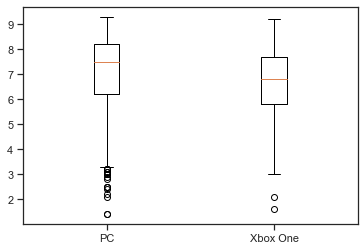

In [168]:
# pc_user_ratings = []
# xbox_user_ratings = []

from scipy import stats as st

pc_user_ratings = data[data['platform']=='PC']['user_score2'].dropna() #Creating a series rfom the columns
xone_user_ratings = data[data['platform']=='XOne']['user_score2'].dropna() #Creating a series rfom the columns

plt.boxplot([pc_user_ratings, xone_user_ratings])
plt.xticks([1, 2], ['PC', 'Xbox One'])

print('Sample size:', len(pc_user_ratings), len(xone_user_ratings))
print('Sample means: ', np.mean(pc_user_ratings), np.mean(xone_user_ratings))
print('Difference in mean:', np.mean(pc_user_ratings) - np.mean(xone_user_ratings))


alpha = .05 
difference_in_avg_rating =  st.ttest_ind(pc_user_ratings, xone_user_ratings)

print('p-value: ', difference_in_avg_rating.pvalue ) # divide the p-value by 2 because we need a one-sided test
if (difference_in_avg_rating.pvalue < alpha):
        print("We reject the null hypothesis, both platforms' average ratings are not equal")
else:
        print("We can't reject the null hypothesis, both platforms' average ratings are close or equal")

Conclusion:
Comparing the two platform's sample size of PC which equals to 751, and xbox one which is 206, we can see that the mean of both are different (7.03, 6.6). Therefore, it seems that people on average like to play on PC more than xbox. There is uncertainty because we only have a sample of both platforms' user's rating. Had we collected a larger sample, it could be that the conclusions(means) would change. The pvalue is 0.0002, which is very close to 0. This means that eventhought we change the sample sizes which may effect the means, there is a 0.0002 probability that the means would be the same (almost immposible). Therefore, we reject the null hypothsis.

We decided in advance that if the pvalue was lower than .05 (alpha level), we would conclude that the ratings are not the same. Since we observed a pvalue smaller than this (.0002), we conclude that indeed they are not the same. In other words, the alpha works a decision rule. 

### —Average user ratings for the Action and Sports genres are different.


Step 1. Set up hypotheses and select the level of significance α.

Ho: The average user ratings of Xbox One equals the average user rating of PC platforms -->  𝜇_1=𝜇_2

H1: The average user ratings of Xbox One does not equals the average user rating of PC platforms (rejecting H0) --> 𝜇_1!=𝜇_2

α = 0.05 # if the p-value is less than alpha, we reject the hypothesis

Step 2. Select the appropriate test statistic.

In [169]:
data.genre.unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Simulation',
       'Role-Playing', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'], dtype=object)

Sample size: 2083 1316
Sample means:  7.012256761081756 6.920535623823987
Difference in mean: 0.09172113725776843
p-value:  0.08005177493684953
We can't reject the null hypothesis, both genres' user ratings average are very close or equal


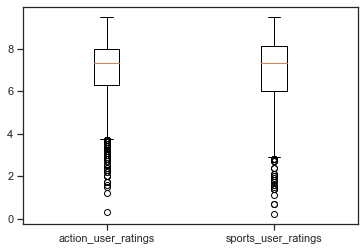

In [170]:
action_user_ratings = data[data['genre']=='Action']['user_score2'].dropna() #Creating a series rfom the columns
sports_user_ratings = data[data['genre']=='Sports']['user_score2'].dropna() #Creating a series rfom the columns

plt.boxplot([action_user_ratings, sports_user_ratings])
plt.xticks([1, 2], ['action_user_ratings', 'sports_user_ratings'])

print('Sample size:', len(action_user_ratings), len(sports_user_ratings))
print('Sample means: ', np.mean(action_user_ratings), np.mean(sports_user_ratings))
print('Difference in mean:', np.mean(action_user_ratings) - np.mean(sports_user_ratings))


alpha = .05 
difference_in_avg_rating =  st.ttest_ind(action_user_ratings, sports_user_ratings)

print('p-value: ', difference_in_avg_rating.pvalue ) # divide the p-value by 2 because we need a one-sided test
if (difference_in_avg_rating.pvalue < alpha):
        print("We reject the null hypothesis, both genres' user ratings average are not equal")
else:
        print("We can't reject the null hypothesis, both genres' user ratings average are very close or equal")

## Set the alpha threshold value yourself. Explain:

### —How you formulated the null and alternative hypotheses


Formulated above

### —What significance level you chose to test the hypotheses, and why


A critical value of alpha = 5% is suitable rate, it's good since we are not looking for an accurate probability (pvalue) result to reject or accept the hypothesis. Since we are analyzing a business case, 5% or even 10% would do the work. 1% can be used for more case sensitive researches like medcine. Keep in my that the two ttests conducted are both two tailed. So it will be 2.5% from each side.

# Step 6. Write a general conclusion

Different platforms had different sales and revenue accumulation, the PS seem to dominate generally with sales (I refer to PS2 & PS3 combined), hence Sony did a great job keeping and dominating a significant market share, which indicates a great corporate product life-cycle management skills. 

We can thinkg about it this way; different platforms succeeded in different regions. Another approch to this might be the following; different regions seem to prefer different platforms. 

It's quite important to mention that NA region seem to generate a great amount of revenue to all platforms.

The most dominant genres are Action and sports in all regions in all platforms.